# EDA of the job postings dataset
The goal of this study is to create a RAG based model who's goal is to match CVs to job postings which are found in the dataset which is going ot be analyzed.

To start we will use a subset of the dataset which focuses on specific jobs in a particlar field in order to create our first batches of CVs for these jobs. 

In [1]:
# Open the postings data
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
pd.set_option('display.max_columns', None)


In [2]:
# Read the parquet file
df = pd.read_parquet('postings_linkedin_individual_0000_part_01.parquet')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()


Dataset shape: (81920, 34)

Column names:
['job_id', 'rcid', 'company', 'rics_k50', 'rics_k200', 'rics_k400', 'title_raw', 'title_translated', 'job_category', 'role_k50', 'role_k150', 'role_k300', 'role_k500', 'role_k1000', 'role_k1250', 'role_k1500', 'location_raw', 'region', 'country', 'state', 'metro_area', 'salary', 'post_date', 'remove_date', 'ultimate_parent_rcid', 'ultimate_parent_company_name', 'onet_code', 'onet_title', 'remote_type', 'jobtitle', 'description', 'salary_min', 'salary_max', 'salary_predicted']

First few rows:


,job_id,rcid,company,rics_k50,rics_k200,rics_k400,title_raw,title_translated,job_category,role_k50,role_k150,role_k300,role_k500,role_k1000,role_k1250,role_k1500,location_raw,region,country,state,metro_area,salary,post_date,remove_date,ultimate_parent_rcid,ultimate_parent_company_name,onet_code,onet_title,remote_type,jobtitle,description,salary_min,salary_max,salary_predicted
0,373831869800000000002,6070410,SchÃ¶n Klinik Gruppe,Healthcare and Wellness Services,Mental and Public Health Services,Mental Health and Patient Advocacy,Intensivpfleger (m/w/d) in Düsseldorf,intensive care nurse m w d in düsseldorf,Scientist,Medical Rep,Case Manager,Clinical Specialist,Clinical Specialist,Clinical Specialist,Clinical Specialist,clinical,"Düsseldorf, North Rhine-Westphalia, Germany",Western Europe,Germany,North Rhine-Westphalia,dusseldorf metropolitan area,64809.332872,2023-11-10,2023-11-18,6070410.0,SchÃ¶n Klinik Gruppe,11-9111.00,Medical and Health Services Managers,Fully in Office,intensivpfleger_düsseldorf,• Düsseldorf\n• Berufserfahrung\n• Krankenpfle...,NaN,NaN,True
1,370402171700000000002,405626,"Nevada HAND, Inc.",Real Estate and Development,Real Estate Development and Management,Real Estate Development and Management,Caregiver,caregiver,Scientist,Medical Rep,Medical Rep,Nurse,Nurse,CNA,CNA,cna,"Las Vegas, NV",Northern America,United States,Nevada,las vegas metropolitan area,26777.107182,2023-09-08,2023-09-10,405626.0,"Nevada HAND, Inc.",31-1121.00,Home Health Aides,Fully in Office,caregiver,Summary Duties And Responsibilities\n\nProvide...,NaN,NaN,True
2,347726240300000000002,730244,"Great Clips, Inc.",Wellness Products,Health and Beauty Care,Beauty and Personal Care Services,Assistant Salon Manager - White City Shopping ...,assistant salon manager white city shopping ...,Sales,Merchandiser,Merchandiser,Visual Merchandiser,Visual Merchandiser,Visual Merchandiser,Visual Merchandising Manager,visual merchandising,"Lancaster, MA",Northern America,United States,Massachusetts,boston metropolitan area,29952.545556,2023-02-19,2023-02-19,730244.0,"Great Clips, Inc.",27-1026.00,Merchandise Displayers and Window Trimmers,Fully in Office,assistant_salon_manager_white_city_shopping_ce...,Got shears and a winning attitude? Have a year...,NaN,NaN,True
3,3851002279,980711,Elora SAS,Apparel Retail,Apparel and Fashion Retail,Luxury Fashion and Accessories,Vendeur en Prêt-À-Porter à Domicile Vdi H/F,home readytoport seller vdi h/f,Sales,Customer Service,Customer Service,Customer Service,Customer Service,Customer Service Representative,Customer Service Representative,customer service representative,"Tournefeuille, Occitanie, France",Western Europe,France,Occitanie,toulouse metropolitan area,49800.456350,2024-03-08,2024-03-19,22175373.0,Alvega Groupe SA,43-4051.00,Customer Service Representatives,Fully in Office,vendeur_en_prêt_porter_domicile_vdi,Elora : Élégance à Domicile Depuis 1978<br/><b...,NaN,NaN,True
4,3892258137,14069521,Jobs via eFinancialCareers,Human Resources Services,Employment and Staffing Services,Recruitment and Staffing Services,Alternance - Chargé.e de missions innovation (...,workstudy workstudy workstudy workstudy workstud,Sales,Product Manager,Corporate Strategy,Corporate Strategy,Strategy Consultant,Strategy Analyst,Strategy Analyst,strategy analyst,"Paris, Île-de-France, France",Western Europe,France,Ile-de-France,paris metropolitan area,60412.041271,2024-04-08,2024-04-09,14069521.0,Jobs via eFinancialCareers,13-2099.01,Financial Quantitative Analysts,Fully in Office,alternance_chargé_de_missions_innovation_mois_...,<strong>Alternance - Chargé.e de missions inno...,NaN,NaN,True


Arbitrarily selecting only canadian job postings to shrink the inital size of the dataset as well to make sure that the postings are in english and that there wouldn't be any translation errors.


In [4]:
df = df[df['country'] == 'Canada']

In [10]:
df

,job_id,rcid,company,rics_k50,rics_k200,rics_k400,title_raw,title_translated,job_category,role_k50,role_k150,role_k300,role_k500,role_k1000,role_k1250,role_k1500,location_raw,region,country,state,metro_area,salary,post_date,remove_date,ultimate_parent_rcid,ultimate_parent_company_name,onet_code,onet_title,remote_type,jobtitle,description,salary_min,salary_max,salary_predicted
74,3403281111,939062,"LanceSoft, Inc.",IT Consulting Services,IT Consulting Services,IT Staffing and Consulting Services,Data Engineering Manager,data engineering manager,Engineer,Software Engineer,Software Engineer,Software Engineer,Software Engineer,Software Engineering,Software Engineering,software engineering,"North York, Ontario, Canada",Northern America,Canada,Ontario,toronto metropolitan area,82592.251026,2022-12-13,2023-01-12,939062.0,"LanceSoft, Inc.",15-1252.00,Software Developers,Fully in Office,data_engineering_manager,<strong>Job Description...<br/></strong> <p> ...,NaN,NaN,True
104,2944718462,40582,"Diversey, Inc.",Materials Manufacturing,Chemicals and Materials Manufacturing,Specialty Chemicals and Materials,Work Center Operator- Contract Position,work center operator contract position,Engineer,Machine Operator,Mechanic,Mechanic,Aircraft Mechanic,Aircraft Mechanic,Aircraft Mechanic,aircraft mechanic,"London, Ontario, Canada",Northern America,Canada,Ontario,london metropolitan area (canada),27899.139058,2022-01-28,2022-02-28,94933873.0,Olympus Water Holdings IV LP,49-3011.00,Aircraft Mechanics and Service Technicians,Fully in Office,work_center_operator_contract_position,We are currently recruiting for 5 positions on...,NaN,NaN,True
126,2941197774000000000010,700457,"TVI, Inc. (Washington)",Apparel Retail,Apparel and Fashion Retail,Apparel and Accessories Retail,Retail Supervisor,retail supervisor,Sales,Retail Sales,Retail Sales,Store Manager,Store Manager,Store Manager,Retail Store Manager,retail store,"Peterborough, Ontario, Canada",Northern America,Canada,Ontario,canada nonmetropolitan area,26737.078644,2022-07-13,2022-07-13,700457.0,"TVI, Inc. (Washington)",41-1011.00,First-Line Supervisors of Retail Sales Workers,Fully in Office,retail_supervisor,Who We Are\n\nThe Savers family of stores is a...,NaN,NaN,True
132,390555383800000000002,270312,EcoVenture AB,Hospitality and Tourism Management,Entertainment Hospitality,Theme Parks and Entertainment Resorts,Intermediate Vegetation and Wetland Ecologist,intermediate vegetation and wetland ecologist,Engineer,Sustainability Specialist,Sustainability Specialist,Environmental Specialist,Environmental Specialist,Environmental Scientist,Environmental Scientist,environmental scientist,"Edmonton, Alberta, Canada",Northern America,Canada,Alberta,edmonton metropolitan area,50563.235653,2024-07-02,2024-07-16,270312.0,EcoVenture AB,19-2041.00,"Environmental Scientists and Specialists, Incl...",Fully in Office,intermediate_vegetation_wetland_ecologist,Thank you very much for your time and consider...,NaN,NaN,True
192,358108932100000000002,1168823,"Lululemon USA, Inc.",Apparel Retail,Apparel and Fashion Retail,Apparel and Accessories Retail,Part-Time Educator | West 4th,part time educator | west 4th,Admin,Coordinator,Corporate Trainer,Corporate Trainer,Teacher,Teacher,Teacher,teacher,"Vancouver, British Columbia, Canada",Northern America,Canada,British Columbia,vancouver metropolitan area,32592.071125,2023-04-28,2023-04-28,22169169.0,"lululemon athletica, Inc.",25-2032.00,"Career/Technical Education Teachers, Secondary...",Fully in Office,part_time_educator_west_th,Description & Requirements\n\nWho We Are:\n\nl...,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81774,3051647148,22159224,"Home Depot of Canada, Inc.",Retail and Consumer Goods,Retail and Consumer Goods,Retail and Consumer Goods,"Global Search Analyst, Ecommerce",global search analyst ecommerce,Engineer,Data Analyst,Data Scientist,Analytics 

Selecting the smallest job category, we still see below lots of diversity in the role as well as the industry

In [5]:
df['job_category'].value_counts()

job_category
Engineer      594
Sales         530
Admin         207
Scientist     207
Operations    164
Finance       160
Marketing      94
Name: count, dtype: int64

In [12]:
df[['job_category', 'role_k50']].value_counts()

job_category  role_k50                   
Scientist     Medical Rep                    172
Engineer      Software Engineer              147
Sales         Cashier                        114
Operations    Distribution Specialist        108
Engineer      Machine Operator               105
Sales         Crew Member                     88
              Customer Service                84
Admin         Coordinator                     76
Engineer      Mechanical Engineer             68
Sales         Sales Associate                 58
              Retail Sales                    58
Admin         Operations Administrator        54
Finance       Accountant                      51
Sales         Receptionist                    38
Finance       Financial Advisor               38
Engineer      IT Specialist                   36
Sales         Sales Representative            36
Marketing     Marketing                       32
Finance       Billing Specialist              30
Admin         Human Resourc

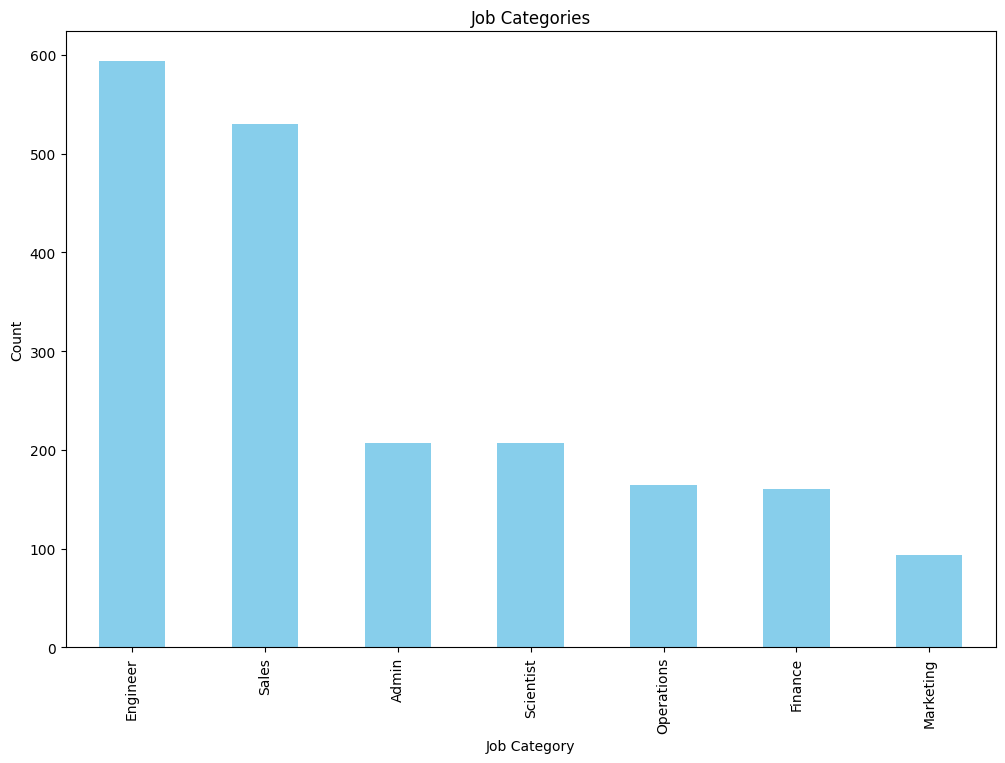

In [13]:
# create a plot of the job categories and the role_k50
import matplotlib.pyplot as plt

# get the proportions of job postings for each job category and break it down by role_k50
job_category_counts = df['job_category'].value_counts()
role_k50_counts = df['role_k50'].value_counts()

# create a bar plot of the job categories and the role_k50
plt.figure(figsize=(12, 8))
job_category_counts.plot(kind='bar', color='skyblue')
plt.title('Job Categories')
plt.xlabel('Job Category')
plt.ylabel('Count')
plt.show()

In [6]:
# Get all rows where the role_k50 is 'Marketing'
marketing_df = df[df['job_category'] == 'Marketing']

marketing_df

,job_id,rcid,company,rics_k50,rics_k200,rics_k400,title_raw,title_translated,job_category,role_k50,role_k150,role_k300,role_k500,role_k1000,role_k1250,role_k1500,location_raw,region,country,state,metro_area,salary,post_date,remove_date,ultimate_parent_rcid,ultimate_parent_company_name,onet_code,onet_title,remote_type,jobtitle,description,salary_min,salary_max,salary_predicted
1618,3914607161,514166,Prosper Canada,Public Sector Management,Public and Environmental Affairs,Policy and Humanitarian,Prosper Canada is seeking volunteers for its B...,prosper canada is seeking volunteers for its b...,Marketing,Communications Specialist,Communications Specialist,Employee Relations,Government Affairs,Government Affairs,Government Affairs,government affairs,"Toronto, Ontario, Canada",Northern America,Canada,Ontario,toronto metropolitan area,87342.741651,2024-04-30,2024-04-30,514166.0,Prosper Canada,11-2032.00,Public Relations Managers,Fully in Office,prosper_canada_seeking_volunteers_board_directors,"We thank all applicants for their interest, ho...",NaN,NaN,True
2270,2713369163,1199670,Creative Circle LLC,Marketing and Advertising Services,Marketing and Advertising Services,Marketing and Advertising Services,Production Designer,production designer,Marketing,Designer,Graphic Designer,Graphic Designer,Creative Services,Graphic Artist,Production Artist,production artist,"Toronto, Ontario, Canada",Northern America,Canada,Ontario,toronto metropolitan area,52114.504258,2021-09-13,2021-10-16,730545.0,ASGN Incorporated,51-5111.00,Prepress Technicians and Workers,Fully in Office,production_designer,Our cannabis client is looking for Production ...,NaN,NaN,True
3162,3225614770,950402,Canadian Imperial Bank of Commerce,Financial Services,Financial Services,Banking and Financial Services,"Campus Event - Ask a Hiring Manager (Sept 20, ...",campus event ask a hiring manager sept 20 2022,Marketing,Communications Specialist,Public Relations,Event Specialist,Event Specialist,Event Specialist,Event Specialist,events,"Toronto, Ontario, Canada",Northern America,Canada,Ontario,toronto metropolitan area,52864.191631,2022-08-17,2022-08-17,950402.0,Canadian Imperial Bank of Commerce,13-1121.00,"Meeting, Convention, and Event Planners",Fully in Office,campus_event_ask_hiring_manager_sept,We’re building a relationship-oriented bank fo...,NaN,NaN,True
4015,4052132836,632698,"GHGSat, Inc.",Aerospace and Defense,Aerospace and Defense Services,Aerospace and Defense Services,Graphic Designer,graphic designer,Marketing,Designer,Graphic Designer,Graphic Designer,Graphic Designer,Graphic Designer,Graphic Designer,graphic design,"Montreal, Quebec, Canada",Northern America,Canada,Quebec,montreal metropolitan area,50568.505787,2024-10-17,2024-12-13,632698.0,"GHGSat, Inc.",27-1024.00,Graphic Designers,Fully in Office,graphic_designer,<p><strong>Graphic Designer (Temporary Contrac...,NaN,NaN,True
5990,3891558932,948738,Varsity Tutors LLC,Professional Development Services,E-Learning Services,Professional Development and E-Learning Services,British Columbia IB French Tutor,british columbia ib french tutor,Marketing,Producer,Writer,Writer,Writer,Editor,Editor,journalist,"Vancouver, British Columbia, Canada",Northern America,Canada,British Columbia,vancouver metropolitan area,58939.896525,2024-04-09,2024-04-09,517383.0,"Nerdy, Inc.",27-3023.00,"News Analysts, Reporters, and Journalists",Fully in Office,british_columbia_ib_french_tutor,British Columbia IB French Tutor Job<br/><br/>...,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79693,3501771669,29391,Rohit Group of Cos.,Real Estate and Development,Real Estate Development and Management,Real Estate Development and Management,"Regional Marketing Manager, Southern Alberta",regional marketing manager southern alberta,Marketing,Marketing,Brand Manager,Brand Manager,Brand Manager,Customer Marketing,Customer Marketing,customer mar

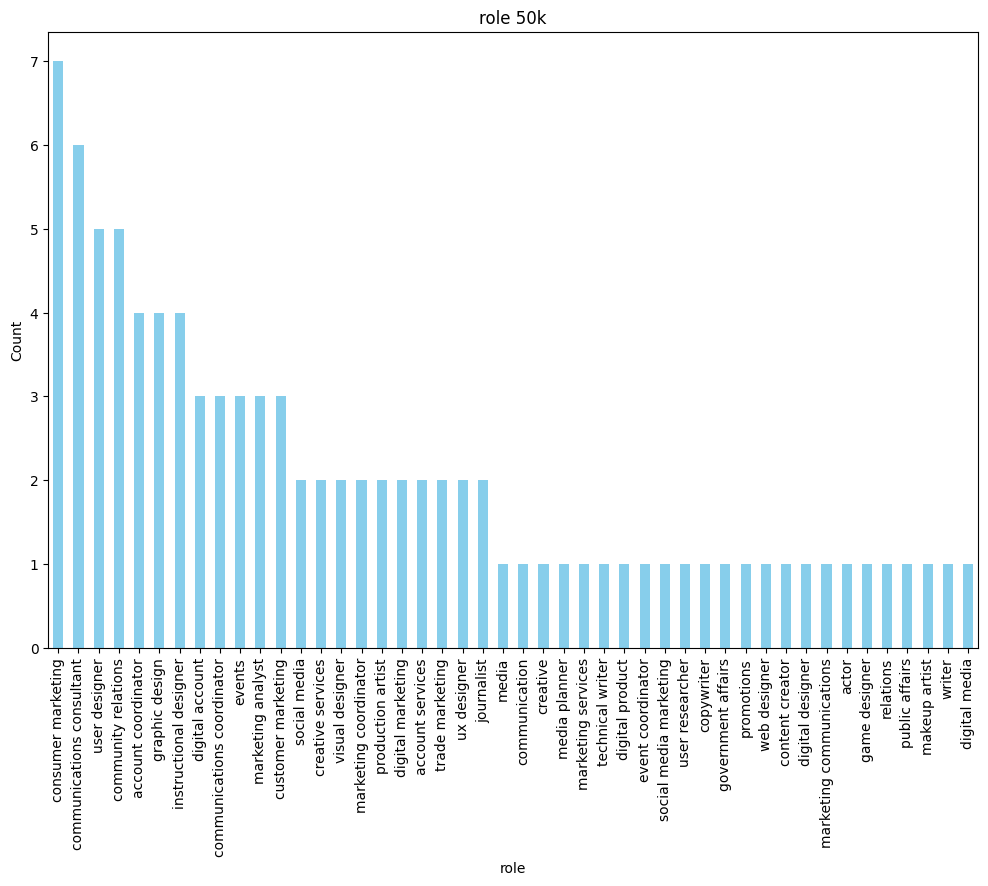

role_k1500
consumer marketing            7
communications consultant     6
user designer                 5
community relations           5
account coordinator           4
graphic design                4
instructional designer        4
digital account               3
communications coordinator    3
events                        3
marketing analyst             3
customer marketing            3
social media                  2
creative services             2
visual designer               2
marketing coordinator         2
production artist             2
digital marketing             2
account services              2
trade marketing               2
ux designer                   2
journalist                    2
media                         1
communication                 1
creative                      1
media planner                 1
marketing services            1
technical writer              1
digital product               1
event coordinator             1
social media marketing       

In [7]:
# create a plot of the job categories and the role_k50
import matplotlib.pyplot as plt

# get the proportions of job postings for each job category and break it down by role_k50
role_k50_counts = marketing_df['role_k1500'].value_counts()

# create a bar plot of the job categories and the role_k50
plt.figure(figsize=(12, 8))
role_k50_counts.plot(kind='bar', color='skyblue')
plt.title('role 50k')
plt.xlabel('role')
plt.ylabel('Count')
plt.show()

role_k50_counts

In [9]:
marketing_df['rics_k50'].value_counts()

rics_k50
Information Technology Services          16
Digital Commerce Services                 7
Human Resources Services                  7
Media and Entertainment                   7
Professional Development Services         6
Public Sector Management                  5
Marketing and Advertising Services        5
Hospitality and Tourism Management        5
Financial Services                        4
Education Services                        4
Humanitarian Services                     4
Healthcare and Wellness Services          4
Automotive Services                       3
Apparel Retail                            2
Retail and Consumer Goods                 2
Biotech and Healthcare Services           2
Aerospace and Defense                     2
Consulting and Advisory Services          1
Logistics and Transportation              1
Packaging Services                        1
IT Consulting Services                    1
Food and Beverage                         1
Wellness Products      

In [10]:
# create a sanple dataset which includes the postings where the role_k1500 values are marketing analyst, custromer marketing, social media, digital, marketting, ux designer, social media marketing, actor, game designer, consumer marketting, and account coordinator
sample_df = marketing_df[marketing_df['role_k1500'].isin(['marketing analyst', 'custromer marketing', 'social media', 'digital', 'marketting', 'ux designer', 'social media marketing', 'actor', 'game designer', 'consumer marketting', 'account coordinator', 'events', 'journalist', 'graphic design'])]

#reset the index of the sample_df
sample_df = sample_df.reset_index(drop=True)

In [11]:
sample_df.shape

(23, 34)

In [44]:
print(sample_df['description'][4])

<strong>About Us:</strong><p>Consumer Genius is a fast-growing company specializing in lead generation and digital marketing, helping businesses connect with high-quality prospects while ensuring compliance with industry regulations. We are looking for a <strong>Virtual Compliance &amp; Marketing Assistant</strong> who is currently a <strong>student</strong> and eager to gain hands-on experience in both compliance and marketing within the digital space.</p><p><br/></p><strong>Position Overview:</strong><p>This dual-role position is ideal for a <strong>current student</strong> pursuing a degree in <strong>marketing, business, law, communications, or a related field</strong>. The <strong>Virtual Compliance &amp; Marketing Assistant</strong> will support our team by ensuring compliance with industry regulations while also assisting with marketing campaigns and research. This is a unique opportunity to develop <strong>legal, regulatory, and marketing skills</strong> in a fast-paced, remote

In [12]:
#save the sample data
sample_df.to_csv('sample_df.csv', index=False)

# Genereate CVs for each of the positions

In [2]:
# read the sample dataset
sample_df = pd.read_csv('sample_df.csv')

In [4]:
sample_df.head()

,job_id,rcid,company,rics_k50,rics_k200,rics_k400,title_raw,title_translated,job_category,role_k50,role_k150,role_k300,role_k500,role_k1000,role_k1250,role_k1500,location_raw,region,country,state,metro_area,salary,post_date,remove_date,ultimate_parent_rcid,ultimate_parent_company_name,onet_code,onet_title,remote_type,jobtitle,description,salary_min,salary_max,salary_predicted
0,3225614770,950402,Canadian Imperial Bank of Commerce,Financial Services,Financial Services,Banking and Financial Services,"Campus Event - Ask a Hiring Manager (Sept 20, ...",campus event ask a hiring manager sept 20 2022,Marketing,Communications Specialist,Public Relations,Event Specialist,Event Specialist,Event Specialist,Event Specialist,events,"Toronto, Ontario, Canada",Northern America,Canada,Ontario,toronto metropolitan area,52864.191631,2022-08-17,2022-08-17,950402.0,Canadian Imperial Bank of Commerce,13-1121.00,"Meeting, Convention, and Event Planners",Fully in Office,campus_event_ask_hiring_manager_sept,We’re building a relationship-oriented bank fo...,NaN,NaN,True
1,4052132836,632698,"GHGSat, Inc.",Aerospace and Defense,Aerospace and Defense Services,Aerospace and Defense Services,Graphic Designer,graphic designer,Marketing,Designer,Graphic Designer,Graphic Designer,Graphic Designer,Graphic Designer,Graphic Designer,graphic design,"Montreal, Quebec, Canada",Northern America,Canada,Quebec,montreal metropolitan area,50568.505787,2024-10-17,2024-12-13,632698.0,"GHGSat, Inc.",27-1024.00,Graphic Designers,Fully in Office,graphic_designer,<p><strong>Graphic Designer (Temporary Contrac...,NaN,NaN,True
2,3891558932,948738,Varsity Tutors LLC,Professional Development Services,E-Learning Services,Professional Development and E-Learning Services,British Columbia IB French Tutor,british columbia ib french tutor,Marketing,Producer,Writer,Writer,Writer,Editor,Editor,journalist,"Vancouver, British Columbia, Canada",Northern America,Canada,British Columbia,vancouver metropolitan area,58939.896525,2024-04-09,2024-04-09,517383.0,"Nerdy, Inc.",27-3023.00,"News Analysts, Reporters, and Journalists",Fully in Office,british_columbia_ib_french_tutor,British Columbia IB French Tutor Job<br/><br/>...,NaN,NaN,True
3,2938258828,2922622,Cornershop by Uber,Digital Commerce Services,Digital Commerce Services,Online Marketplaces and Delivery Services,Partner Coordinator (CPG),partner coordinator cpg,Marketing,Marketing,Brand Manager,Account Coordinator,Account Coordinator,Account Coordinator,Account Coordinator,account coordinator,"Toronto, Ontario, Canada",Northern America,Canada,Ontario,toronto metropolitan area,41784.321211,2022-02-23,2022-03-01,2922622.0,Cornershop by Uber,11-2011.00,Advertising and Promotions Managers,Fully in Office,partner_coordinator_cpg,Cornershop by Uber is an on-demand grocery app...,NaN,NaN,True
4,4169034190,22269817,Consumer Genius Inc.,Information Technology Services,Fintech and Online Marketplaces,Fintech and Online Marketplaces,Virtual Compliance & Marketing Assistant (Stud...,virtual compliance and marketing assistant (...,Marketing,Marketing,Brand Manager,Account Coordinator,Account Coordinator,Account Coordinator,Account Coordinator,account coordinator,Canada,Northern America,Canada,empty,canada nonmetropolitan area,31988.016856,2025-02-27,2025-03-01,22269817.0,Consumer Genius Inc.,11-2011.00,Advertising and Promotions Managers,Fully in Office,virtual_compliance_marketing_assistant_student,<strong>About Us:</strong><p>Consumer Genius i...,NaN,NaN,True


### Setup the agent which will get the data to generate the CVs 

In [3]:
# Get API key from environment
from dotenv import load_dotenv
from src.cv_generator import generate_cv_for_job
import os

In [4]:
# Initialize empty list to store generated CVs
generated_cvs = []

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

if not api_key:
    raise ValueError("Please set OPENAI_API_KEY in .env file")


In [6]:
# Initialize empty lists to store generated CVs and job information
generated_cvs = []
extracted_job_info_list = []

# Generate CV for each job posting
for _, job_row in sample_df.iterrows():
    # Create job dict with required fields
    job_data = {
        "title_raw": job_row["title_translated"],
        "description": job_row["description"],
        "job_category": job_row["job_category"],
        "role_k50": job_row["role_k1250"],
        "company": job_row["company"],
        "location_raw": job_row.get("location_raw", "")
    }
    
    try:
        # Generate CV using the imported function - now returns both CV and job info
        cv, job_info = generate_cv_for_job(job_data, api_key)
        generated_cvs.append(cv)
        extracted_job_info_list.append(job_info)
        print(f"Successfully generated CV for job {job_row['job_id']}: {job_row['jobtitle']} at {job_row['company']}")
    except Exception as e:
        print(f"Error generating CV for job {job_row['job_id']}: {str(e)}")
        generated_cvs.append("")  # Add empty string for failed generations
        extracted_job_info_list.append({})  # Add empty dict for failed generations

Successfully generated CV for job 3225614770: campus_event_ask_hiring_manager_sept at Canadian Imperial Bank of Commerce
Successfully generated CV for job 4052132836: graphic_designer at GHGSat, Inc.
Successfully generated CV for job 3891558932: british_columbia_ib_french_tutor at Varsity Tutors LLC
Successfully generated CV for job 2938258828: partner_coordinator_cpg at Cornershop by Uber
Successfully generated CV for job 4169034190: virtual_compliance_marketing_assistant_student at Consumer Genius Inc.
Successfully generated CV for job 318916301000000000005: training_multimedia_designer at SOTI, Inc.
Successfully generated CV for job 3394633862: ux_designer at Aha! Labs, Inc.
Successfully generated CV for job 4084949822: remote_english_freelance_writer_canada at Outlier AI, Inc.
Successfully generated CV for job 2806590696: graphic_designer at Paper Education Co., Inc.
Successfully generated CV for job 369259529900000000002: environment_artist at Ubisoft Entertainment, Inc.
Successfu

CV generation takes ~20s per job (7min 7s for 22 posts)

In [7]:
def display_job_info(row_index, sample_df, extracted_job_info_list):
    """
    Display extracted job information for a specific row index.
    
    Args:
        row_index: Index of the job row to display
        sample_df: DataFrame containing job data
        extracted_job_info_list: List of extracted job information dictionaries
    """
    if extracted_job_info_list and len(extracted_job_info_list) > row_index:
        print(f"=== EXTRACTED JOB INFORMATION FOR JOB {row_index} ===")
        print(f"Job ID: {sample_df.iloc[row_index]['job_id']}")
        print(f"Job Title: {sample_df.iloc[row_index]['jobtitle']}")
        print(f"Company: {sample_df.iloc[row_index]['company']}")
        print("\n--- Original Job Data ---")
        print(json.dumps(extracted_job_info_list[row_index]['original_job_data'], indent=2))
        print("\n--- Extracted Requirements ---")
        print(json.dumps(extracted_job_info_list[row_index]['extracted_requirements'], indent=2))
        print("\n--- CV Sections Generated ---")
        print(json.dumps(extracted_job_info_list[row_index]['cv_sections'], indent=2))
    else:
        print("No job information extracted yet. Run the CV generation cell first.")

In [8]:
# Display information using index
display_job_info(0, sample_df, extracted_job_info_list)


=== EXTRACTED JOB INFORMATION FOR JOB 0 ===
Job ID: 3225614770
Job Title: campus_event_ask_hiring_manager_sept
Company: Canadian Imperial Bank of Commerce

--- Original Job Data ---
{
  "title_raw": "campus event   ask a hiring manager sept 20 2022",
  "description": "We\u2019re building a relationship-oriented bank for the modern world. We need talented, passionate professionals who are dedicated to doing what\u2019s right for our clients.\n\nAt CIBC, we embrace your strengths and your ambitions, so you are empowered at work. Our team members have what they need to make a meaningful impact and are truly valued for who they are and what they contribute.\n\nTo learn more about CIBC, please visit CIBC.com\n\nJob Description\n\nEvent Information\n\nThe Campus team at CIBC is hosting an Info Session on September 20th, 2022 from 4:00PM \u2013 5:30 PM EST. Learn what\u2019s on offer for Winter 2023 Co-Op, when to apply, and CIBC\u2019s vision and culture and where you fit into that. Enjoy sm

In [9]:
print(generated_cvs[0])

**[Your Name]**

**Contact Information:**
- Phone: [Your Phone Number]
- Email: [Your Email Address]
- LinkedIn: [Your LinkedIn Profile]

**Objective:**
Campus Event Coordinator position at Canadian Imperial Bank of Commerce

**Work Experience:**

**Campus Event Coordinator**
*Maple Leaf University*
- Coordinated and executed 5 campus events hosted by the Campus Team at Maple Leaf University
- Managed event logistics including venue booking, catering, and coordinating with vendors, resulting in a 20% cost savings
- Increased student attendance by 30% through targeted promotional campaigns on social media platforms
- Collaborated with the Campus Team to gather feedback and implement improvements for future events

**Event Planning Assistant**
*EventPro Solutions*
- Assisted in organizing and executing various corporate events, including seminars and conferences
- Maintained event budgets and tracked expenses, ensuring events were within budget constraints
- Coordinated with speakers and

In [16]:
# Add CV and extracted requirements to sample dataframe
sample_df['generated_cv'] = generated_cvs

# Add extracted requirements as a JSON string column
sample_df['extracted_requirements'] = [
    json.dumps(info.get('extracted_requirements', {})) if info else '{}'
    for info in extracted_job_info_list
]

# Save to CSV
sample_df.to_csv('sample_df_with_cv.csv', index=False)

print("Added CV and requirements columns and saved to sample_df_with_cv.csv")
print(f"DataFrame shape: {sample_df.shape}")


Added CV and requirements columns and saved to sample_df_with_cv.csv
DataFrame shape: (23, 36)
